In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Contacts.xlsx to Contacts (1).xlsx


In [6]:
uploaded.__class__

dict

In [2]:
import io
#Importing the data into pandas dataframe
contacts_db = pd.read_excel(io.BytesIO(uploaded['Contacts.xlsx']), 'Database')
contacts_ldc = pd.read_excel(io.BytesIO(uploaded['Contacts.xlsx']), 'Lexique des champs')
contacts_lco = pd.read_excel(io.BytesIO(uploaded['Contacts.xlsx']), 'Lexique codes origine')

In [3]:
contacts_db['BIRTH_DATE'] = contacts_db['BIRTH_DATE'].astype('str')
contacts_db['BIRTH_DATE'] = pd.to_datetime(contacts_db['BIRTH_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['CREATION_DATE'] = contacts_db['CREATION_DATE'].astype('str')
contacts_db['CREATION_DATE'] = pd.to_datetime(contacts_db['CREATION_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['FIRST_DONATION_DATE'] = contacts_db['FIRST_DONATION_DATE'].astype('str')
contacts_db['FIRST_DONATION_DATE'] = pd.to_datetime(contacts_db['FIRST_DONATION_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['LAST_DONATION_DATE'] = contacts_db['LAST_DONATION_DATE'].astype('str')
contacts_db['LAST_DONATION_DATE'] = pd.to_datetime(contacts_db['LAST_DONATION_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['FIRST_PURCHASE_DATE'] = contacts_db['FIRST_PURCHASE_DATE'].astype('str')
contacts_db['FIRST_PURCHASE_DATE'] = pd.to_datetime(contacts_db['FIRST_PURCHASE_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['LAST_PURCHASE_DATE'] = contacts_db['LAST_PURCHASE_DATE'].astype('str')
contacts_db['LAST_PURCHASE_DATE'] = pd.to_datetime(contacts_db['LAST_PURCHASE_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['FIRST_SUBSCRIPTION_DATE'] = contacts_db['FIRST_SUBSCRIPTION_DATE'].astype('str')
contacts_db['FIRST_SUBSCRIPTION_DATE'] = pd.to_datetime(contacts_db['FIRST_SUBSCRIPTION_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['LAST_SUBSCRIPTION_DATE'] = contacts_db['LAST_SUBSCRIPTION_DATE'].astype('str')
contacts_db['LAST_SUBSCRIPTION_DATE'] = pd.to_datetime(contacts_db['LAST_SUBSCRIPTION_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['FIRST_PETITION_DATE'] = contacts_db['FIRST_PETITION_DATE'].astype('str')
contacts_db['FIRST_PETITION_DATE'] = pd.to_datetime(contacts_db['FIRST_PETITION_DATE'], format='%Y%m%d', errors='ignore')
contacts_db['LAST_PETITION_DATE'] = contacts_db['LAST_PETITION_DATE'].astype('str')
contacts_db['LAST_PETITION_DATE'] = pd.to_datetime(contacts_db['LAST_PETITION_DATE'], format='%Y%m%d', errors='ignore')

In [45]:
contacts_db.to_csv('contacts_db_modified.csv')

In [4]:
contacts_db = contacts_db.drop(["EMAIL"], axis=1)

In [34]:
contacts_db

,Unnamed: 0,ID_CTC,Contact Type,BIRTH_DATE,CREATION_DATE,Dead,Mailing address,COUNTRY,Email,Optin,Phone,Stop Phone,Stop mailing,Stop,NPAI>2,SEGMENT_ORIGIN,DONATION_NUMBER,DONATION_AMOUNT,FIRST_DONATION_DATE,LAST_DONATION_DATE,FIRST_DONATION_SOURCE,LAST_DONATION_SOURCE,FIRST_DONATION_AMOUNT,LAST_DONATION_AMOUNT,YEAR_N_DONATION VOLUME,YEAR_N1_DONATION VOLUME,YEAR_N2_DONATION VOLUME,YEAR_N3_DONATION VOLUME,YEAR_N4_DONATION VOLUME,YEAR_N_DONATION_AMOUNT,YEAR_N1_DONATION_AMOUNT,YEAR_N2_DONATION_AMOUNT,YEAR_N3_DONATION_AMOUNT,YEAR_N4_DONATION_AMOUNT,PA_ACTIVE,STARTING_DATE_ACTIVE_PA,ENDING_DATE_ACTIVE_PA,ACTIVE_PA_CYCLE,DATE_LAST_ACTIVE_PA,ACTIVE_PA_ORIGIN,DEBIT_NUMBER,DEBIT_AMOUNT,FIRST_DEBIT_DATE,LAST_DEBIT_DATE,NUMBER_OF_PURCHASE,MAX_VALUE_OF_PURCHASE,MIN_VALUE_OF_PURCHASE,FIRST_PURCHASE_DATE,LAST_PURCHASE_DATE,SUBSCRIPTION_NUMBER,SUBSCRIPTION_AMOUNT,FIRST_SUBSCRIPTION_DATE,LAST_SUBSCRIPTION_DATE,NOMBRE_PETITION,FIRST_PETITION_DATE,LAST_PETITION_DATE
0,0,1,MORAL,NaT,1980-01-01 00:00:00,NaN,yes,FR,no,/,NaN,NaN,NaN,NaN,NaN,DIV,1.0,5.00,2012-02-08,2012-02-08,DIV,DIV,5.00,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,0.0,NaT,NaT
1,1,2,PHYSICAL,NaT,1980-01-01 00:00:00,NaN,no,NaN,no,/,NaN,NaN,yes,NaN,NaN,PA,53.0,17419.38,2008-06-10,2018-04-12,PA,CIEL,4.00,10.00,1.0,3.0,2.0,0.0,3.0,10.0,50.0,10.0,0.0,104.34,0.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,20080610.0,20080610.0,14.0,235.0,1.0,2008-09-30,2012-06-30,0.0,NaN,NaT,NaT,0.0,NaT,NaT
2,2,3,PHYSICAL,NaT,1991-05-01 00:00:00,NaN,yes,FR,yes,no,NaN,NaN,NaN,yes,NaN,VARME,0.0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,25.0,1991-05-01,2005-06-16
3,3,10,PHYSICAL,NaT,1992-09-01 00:00:00,NaN,no,NaN,no,/,NaN,NaN,NaN,NaN,NaN,CORRU,1.0,76.34,1994-04-01,1994-04-01,941AF1A,941AF1A,76.34,76.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,16.0,1992-09-01,2002-02-01
4,4,12,PHYSICAL,NaT,1995-01-01 00:00:00,NaN,yes,FR,no,/,NaN,NaN,NaN,NaN,NaN,PRESI,0.0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,10.0,1995-01-01,2002-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251387,251387,1376608,PHYSICAL,NaT,2018-10-04 00:00:00,NaN,yes,FR,no,/,NaN,NaN,NaN,NaN,NaN,HUMACATFUND_INDONESIA,1.0,30.00,2018-10-05,2018-10-05,HUMACATFUND_INDONESIA,HUMACATFUND_INDONESIA,30.00,30.00,1.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,0.0,NaT,NaT
251388,251388,1376610,PHYSICAL,NaT,2018-10-04 00:00:00,NaN,yes,FR,yes,yes,NaN,NaN,NaN,NaN,NaN,HUMACATFUND_INDONESIA,1.0,60.00,2018-10-05,2018-10-05,HUMACATFUND_INDONESIA,HUMACATFUND_INDONESIA,60.00,60.00,1.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,0.0,NaT,NaT
251389,251389,1376616,PHYSICAL,NaT,2018-10-05 00:00:00,NaN,yes,FR,no,/,NaN,NaN,NaN,NaN,NaN,HUMACATFUND_INDONESIA,1.0,100.00,2018-10-05,2018-10-05,HUMACATFUND_INDONESIA,HUMACATFUND_INDONESIA,100.00,100.00,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,0.0,NaT,NaT
251390,251390,1376618,PHYSICAL,NaT,2018-10-05 00:00:00,NaN,yes,FR,yes,yes,NaN,NaN,NaN,NaN,NaN,HUMACATFUND_INDONESIA,1.0,50.00,2018-10-05,2018-10-05,HUMACATFUND_INDONESIA,HUMACATFUND_INDONESIA,50.00,50.00,1.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaT,NaT,0.0,NaN,NaT,NaT,0.0,NaT,NaT


In [35]:
contacts_lco

,SEGMENT_ORIGIN,acquisition channel,Aggregated acquisition channel,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,acquisition channel.1,Aggregated acquisition channel.1
0,CI,Prospection direct mailing,eMail,NaN,NaN,NaN,NaN,Paper-based retention (mail),Mail
1,PMD0801POL,Prospection direct mailing,eMail,NaN,NaN,NaN,NaN,Paper petition events,Mail
2,PMD1001POL,Prospection direct mailing,eMail,NaN,NaN,NaN,NaN,"""Tombé du ciel"" - Unidentified origin",Divers
3,PMD1002PAR,Prospection direct mailing,eMail,NaN,NaN,NaN,NaN,Membership / Subscription,Divers
4,PMDPOL,Prospection direct mailing,eMail,NaN,NaN,NaN,NaN,Volunteering,Divers
...,...,...,...,...,...,...,...,...,...
1972,TRANS,Mobilisation campaign,Mail,NaN,NaN,NaN,NaN,NaN,NaN
1973,TUR00,Mobilisation campaign,Mail,NaN,NaN,NaN,NaN,NaN,NaN
1974,VARME,Mobilisation campaign,Mail,NaN,NaN,NaN,NaN,NaN,NaN
1975,VIAND,Mobilisation campaign,Mail,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dict_src = dict(zip(contacts_lco['SEGMENT_ORIGIN'],contacts_lco['acquisition channel']))

In [6]:
contacts_db = contacts_db.replace({"SEGMENT_ORIGIN" : dict_src})
contacts_db = contacts_db.replace({"FIRST_DONATION_SOURCE" : dict_src})
contacts_db = contacts_db.replace({"LAST_DONATION_SOURCE" : dict_src})

In [7]:
contacts_db = contacts_db.drop(['Unnamed: 0', 'ID_CTC'], axis=1)

In [8]:
donation_behavior = contacts_db[['YEAR_N_DONATION_AMOUNT','YEAR_N1_DONATION_AMOUNT', 'YEAR_N2_DONATION_AMOUNT', 'YEAR_N3_DONATION_AMOUNT', 'YEAR_N4_DONATION_AMOUNT']]

In [9]:
def categorize(x):
  if (x<1500):
    return 'LOW'
  elif (x>1500 and x<3000):
    return 'MED'
  else:
    return 'HIGH'
donation_behavior['YEAR_N_DONATION_AMOUNT'] = donation_behavior['YEAR_N_DONATION_AMOUNT'].apply(categorize)
donation_behavior['YEAR_N1_DONATION_AMOUNT'] = donation_behavior['YEAR_N1_DONATION_AMOUNT'].apply(categorize)
donation_behavior['YEAR_N2_DONATION_AMOUNT'] = donation_behavior['YEAR_N2_DONATION_AMOUNT'].apply(categorize)
donation_behavior['YEAR_N3_DONATION_AMOUNT'] = donation_behavior['YEAR_N3_DONATION_AMOUNT'].apply(categorize)
donation_behavior['YEAR_N4_DONATION_AMOUNT'] = donation_behavior['YEAR_N4_DONATION_AMOUNT'].apply(categorize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
donation_behavior.to_csv('Donation_Behavior.csv')

KeyboardInterrupt: ignored

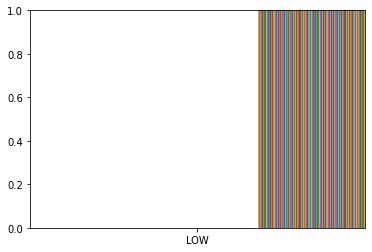

In [16]:
plt.hist(donation_behavior)